## Cell Cycle Analysis

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
import scanpy as sc
import scipy.io
import os
import math
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap 
import celltypist
import seaborn as sns
from pathlib import Path
%matplotlib inline


In [7]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi=100, dpi_save=300, figsize=(5, 5))
plt.set_cmap('viridis')

In [24]:
cell_cycle_genes = [x.strip() for x in open('regev_lab_cell_cycle_genes.txt')]

In [25]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [26]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

2023-10-20 10:02:27.785545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 10:02:27.933407: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-20 10:02:27.937133: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-20 10:02:27.937157: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

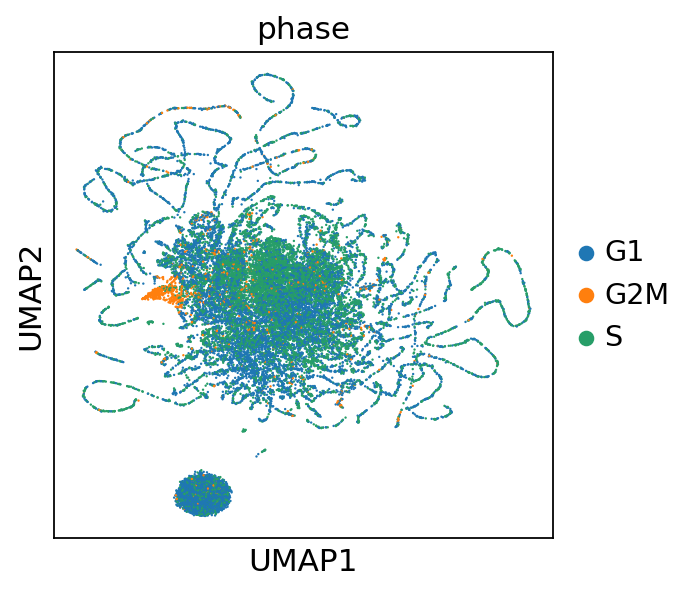

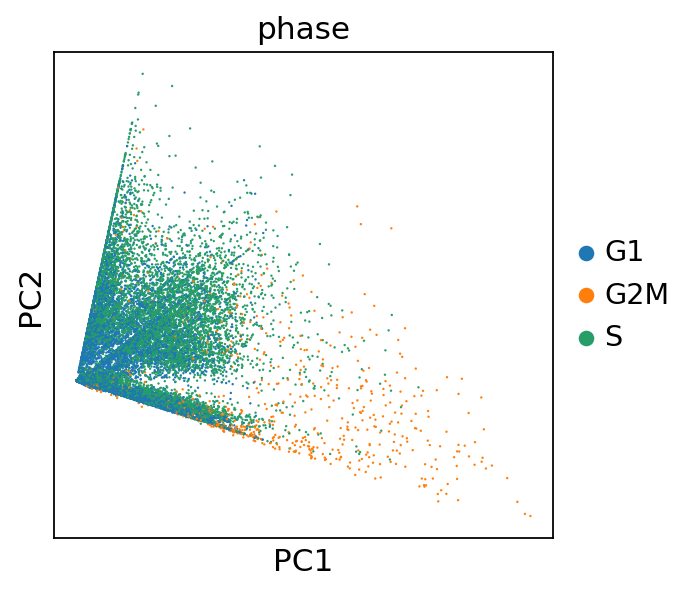

In [27]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pp.neighbors(adata_cc_genes)
sc.tl.umap(adata_cc_genes)
sc.pl.umap(adata_cc_genes, color='phase')
sc.pl.pca(adata_cc_genes,color='phase')

In [28]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score','total_counts', 'pct_counts_mt'])
sc.pp.scale(adata,max_value=10)

... storing 'phase' as categorical


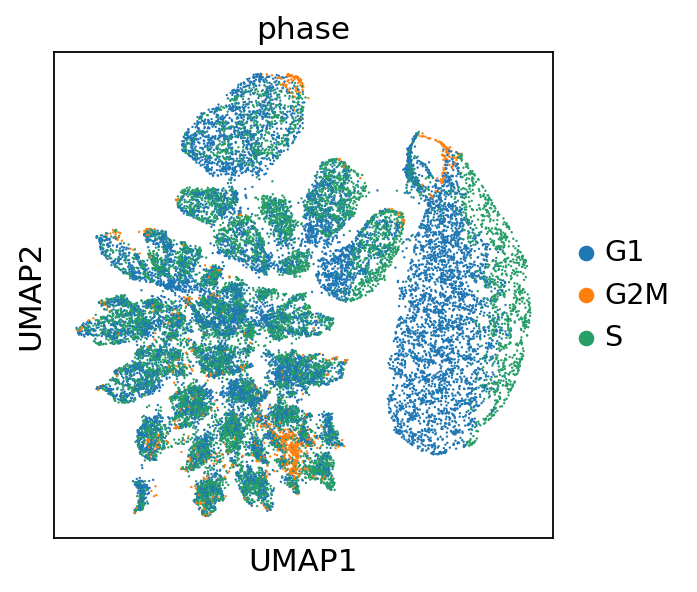

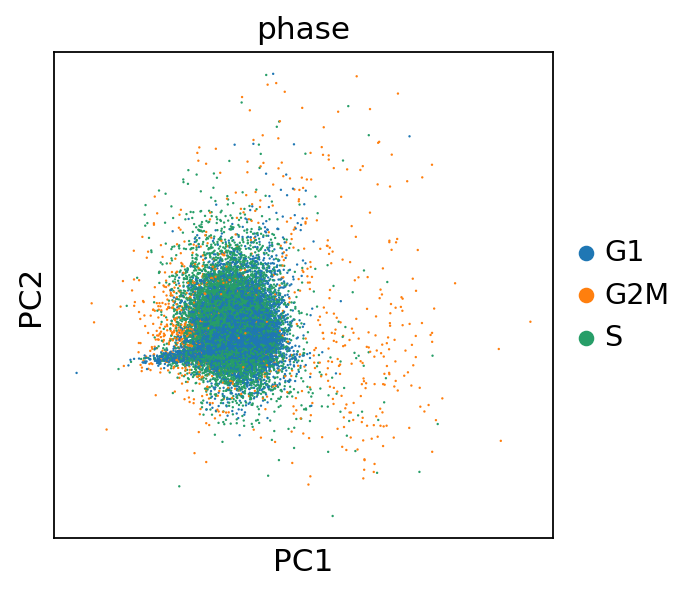

In [29]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pp.neighbors(adata_cc_genes)
sc.tl.umap(adata_cc_genes)
sc.pl.umap(adata_cc_genes, color='phase')
sc.pl.pca(adata_cc_genes,color='phase')

In [30]:
times = ['DUR_JE','SS_JE','JH_JE']
categories = adata.obs['phase'].cat.categories.tolist()
histogram_dict = {}
for time in times:
    histogram_data = adata[adata.obs['BATCH'].isin([time])]
    histogram_count = histogram_data.obs.groupby(['phase'])['BATCH'].count()
    histogram_count = histogram_count.reindex(categories, fill_value=0)
    histogram_dict[time] = histogram_count

list1 = []
for time in times:
    list1.append(histogram_dict[time])
list1 = np.array(list1)
print(list1)

[[7607  275 3790]
 [4858  676 6395]
 [1686   96  863]]


数值结果：
DUR_JE: 65.2% G1 (7607), 2.4% G2M (275), 32.5% S (3790)
SS_JE: 40.7% G1 (4858), 5.7% G2M (676), 53.6% S (6395)
JH_JE: 63.7% G1 (1686), 3.6% G2M (96), 32.6% S (863)


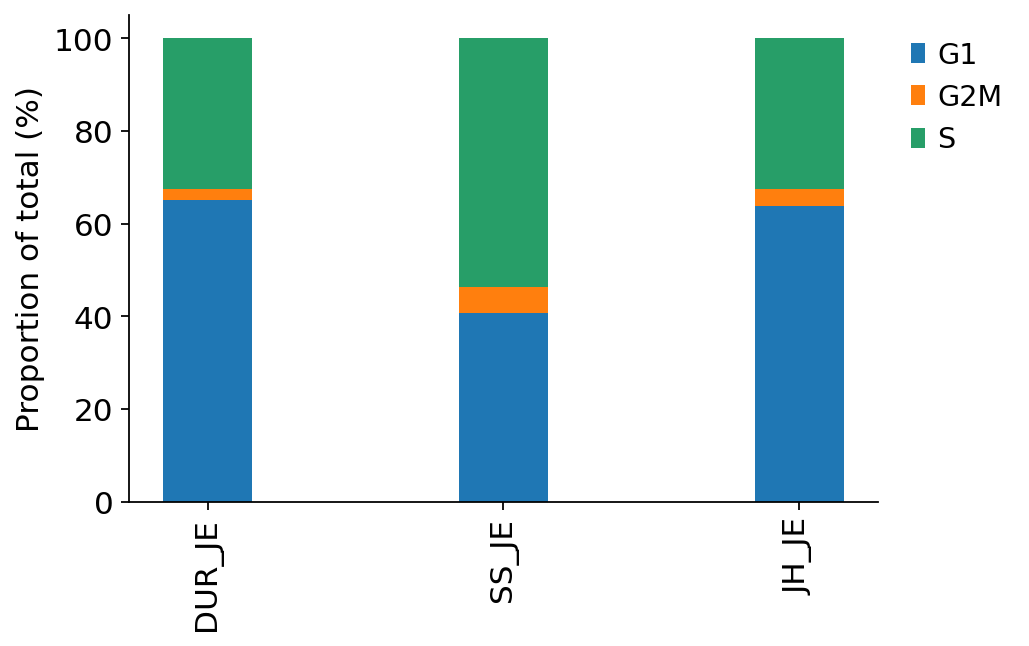

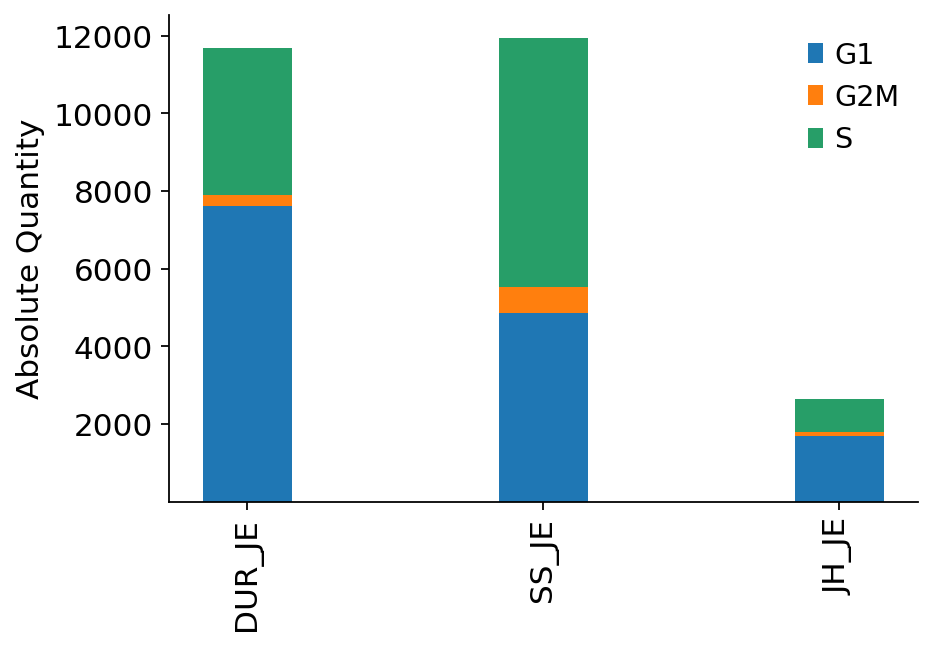

In [31]:
xlabels = times
ylabels = ['0', '20', '40', '60', '80', '100']
time1 = np.array(list1[:, 0])
time2 = np.array(list1[:, 1])
time3 = np.array(list1[:, 2])

data = [time1,time2,time3]
legend = categories

x = range(len(xlabels))
width = 0.3
bottom_y = np.zeros(len(xlabels))
data = np.array(data)
sums = np.sum(data, axis=0)

numerical_results = [[] for _ in range(len(xlabels))]

plt.figure(figsize=(6, 4))
for i in range(len(data)):
    y = data[i] / sums
    plt.bar(x, y, width, bottom=bottom_y)
    bottom_y = y + bottom_y

    for j, v in enumerate(y):
        numerical_results[j].append(f'{v:.1%} {legend[i]} ({data[i][j]})')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(False)
plt.legend(frameon=False, bbox_to_anchor=(1.01, 1), fancybox=True, ncol=1, labels=legend)
plt.ylabel("Proportion of total (%)")
plt.xticks(x, xlabels, rotation=90)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ylabels)

print("数值结果：")
for i, label in enumerate(xlabels):
    print(f"{label}: {', '.join(numerical_results[i])}")

plt.figure(figsize=(6, 4))
for i in range(len(data)):
    plt.bar(x, data[i], width, bottom=bottom_y)
    bottom_y = data[i] + bottom_y

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(False)
plt.legend(frameon=False, bbox_to_anchor=(1.01, 1), fancybox=True, ncol=1, labels=legend)
plt.ylabel("Absolute Quantity")
plt.xticks(x, xlabels, rotation=90)
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 17 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'G', 'M', 'P', 'S', 'U', 'a', 'e', 'h', 'nonmarkingreturn', 'one', 'p', 's', 'space', 'two']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 42, 48, 51, 54, 56, 68, 72, 75, 83, 86]
Closed glyph list over 'GSUB': 17 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'G', 'M', 'P', 'S', 'U', 'a', 'e', 'h', 'nonmarkingreturn', 'one', 'p', 's', 'space', 'two']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 42, 48, 51, 54, 56, 68, 72, 75, 83, 86]
Closing glyph list over 'MATH': 17 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'G', 'M', 'P', 'S', 'U', 'a', 'e', 'h', 'nonmarkingreturn', 'one', 'p', 's', 'space', 'two']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 42, 48, 51, 54, 56, 68, 72, 75, 83, 86]
Closed glyph list over 'MATH': 17 glyphs after
Glyph names: 

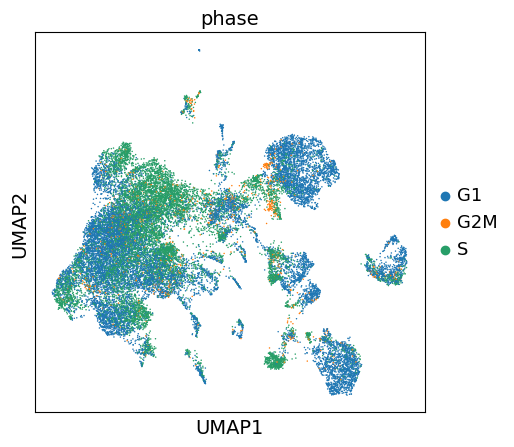

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 34 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'I', 'K', 'L', 'M', 'N', 'P', 'T', 'U', 'a', 'c', 'd', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 's', 'space', 't', 'two', 'underscore', 'y']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 37, 38, 40, 44, 46, 47, 48, 49, 51, 55, 56, 66, 68, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 86, 87, 92]
Closed glyph list over 'GSUB': 34 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'I', 'K', 'L', 'M', 'N', 'P', 'T', 'U', 'a', 'c', 'd', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 's', 'space', 't', 'two', 'underscore', 'y']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 36, 37, 38, 40, 44, 46, 47, 48, 49, 51, 55, 56, 66, 68, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 86, 87,

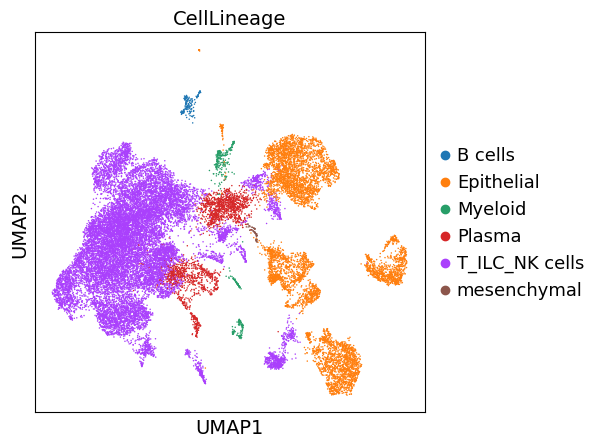

In [59]:
adata=sc.read_h5ad('adata_CellLineage.h5ad')
sc.pl.umap(adata, color='phase',save='_phase.pdf')
sc.pl.umap(adata, color='CellLineage',save='_CellLineage.pdf')

In [60]:
adata.obs['BREED-CellLineage'] = adata.obs[['BREED','CellLineage']].apply(lambda x: '-'.join(x), axis=1)

In [61]:
times = ['DUR-T_ILC_NK cells','SS-T_ILC_NK cells','JH-T_ILC_NK cells','DUR-B cells','SS-B cells','JH-B cells',
         'DUR-Myeloid','SS-Myeloid','JH-Myeloid','DUR-Plasma','SS-Plasma','JH-Plasma',
         'DUR-Epithelial','SS-Epithelial','JH-Epithelial']
categories = adata.obs['phase'].cat.categories.tolist()
histogram_dict = {}
for time in times:
    histogram_data = adata[adata.obs['BREED-CellLineage'].isin([time])]
    histogram_count = histogram_data.obs.groupby(['phase'])['BREED-CellLineage'].count()
    histogram_count = histogram_count.reindex(categories, fill_value=0)
    histogram_dict[time] = histogram_count

list1 = []
for time in times:
    list1.append(histogram_dict[time])
list1 = np.array(list1)
print(list1)

[[2799  166 3147]
 [4031  439 5437]
 [ 603   25  511]
 [   5    1    4]
 [  11   27   69]
 [  18    1   19]
 [  44    5   26]
 [  80    8   54]
 [ 133    7   23]
 [ 209   26  213]
 [ 244   74  309]
 [ 624   37  186]
 [4546   77  400]
 [ 481  125  520]
 [ 280   25  123]]


maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 48 glyphs before
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'a', 'c', 'd', 'e', 'eight', 'f', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'r', 's', 'six', 'space', 't', 'two', 'underscore', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 19, 20, 21, 23, 25, 27, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 66, 68, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 92]
Closed glyph list over 'GSUB': 53 glyphs after
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'a', 'c', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'h', 'hyphen', 'i', 'l', 'm',

数值结果：
DUR-T_ILC_NK cells: 45.8% G1 (2799), 2.7% G2M (166), 51.5% S (3147)
SS-T_ILC_NK cells: 40.7% G1 (4031), 4.4% G2M (439), 54.9% S (5437)
JH-T_ILC_NK cells: 52.9% G1 (603), 2.2% G2M (25), 44.9% S (511)
DUR-B cells: 50.0% G1 (5), 10.0% G2M (1), 40.0% S (4)
SS-B cells: 10.3% G1 (11), 25.2% G2M (27), 64.5% S (69)
JH-B cells: 47.4% G1 (18), 2.6% G2M (1), 50.0% S (19)
DUR-Myeloid: 58.7% G1 (44), 6.7% G2M (5), 34.7% S (26)
SS-Myeloid: 56.3% G1 (80), 5.6% G2M (8), 38.0% S (54)
JH-Myeloid: 81.6% G1 (133), 4.3% G2M (7), 14.1% S (23)
DUR-Plasma: 46.7% G1 (209), 5.8% G2M (26), 47.5% S (213)
SS-Plasma: 38.9% G1 (244), 11.8% G2M (74), 49.3% S (309)
JH-Plasma: 73.7% G1 (624), 4.4% G2M (37), 22.0% S (186)
DUR-Epithelial: 90.5% G1 (4546), 1.5% G2M (77), 8.0% S (400)
SS-Epithelial: 42.7% G1 (481), 11.1% G2M (125), 46.2% S (520)
JH-Epithelial: 65.4% G1 (280), 5.8% G2M (25), 28.7% S (123)


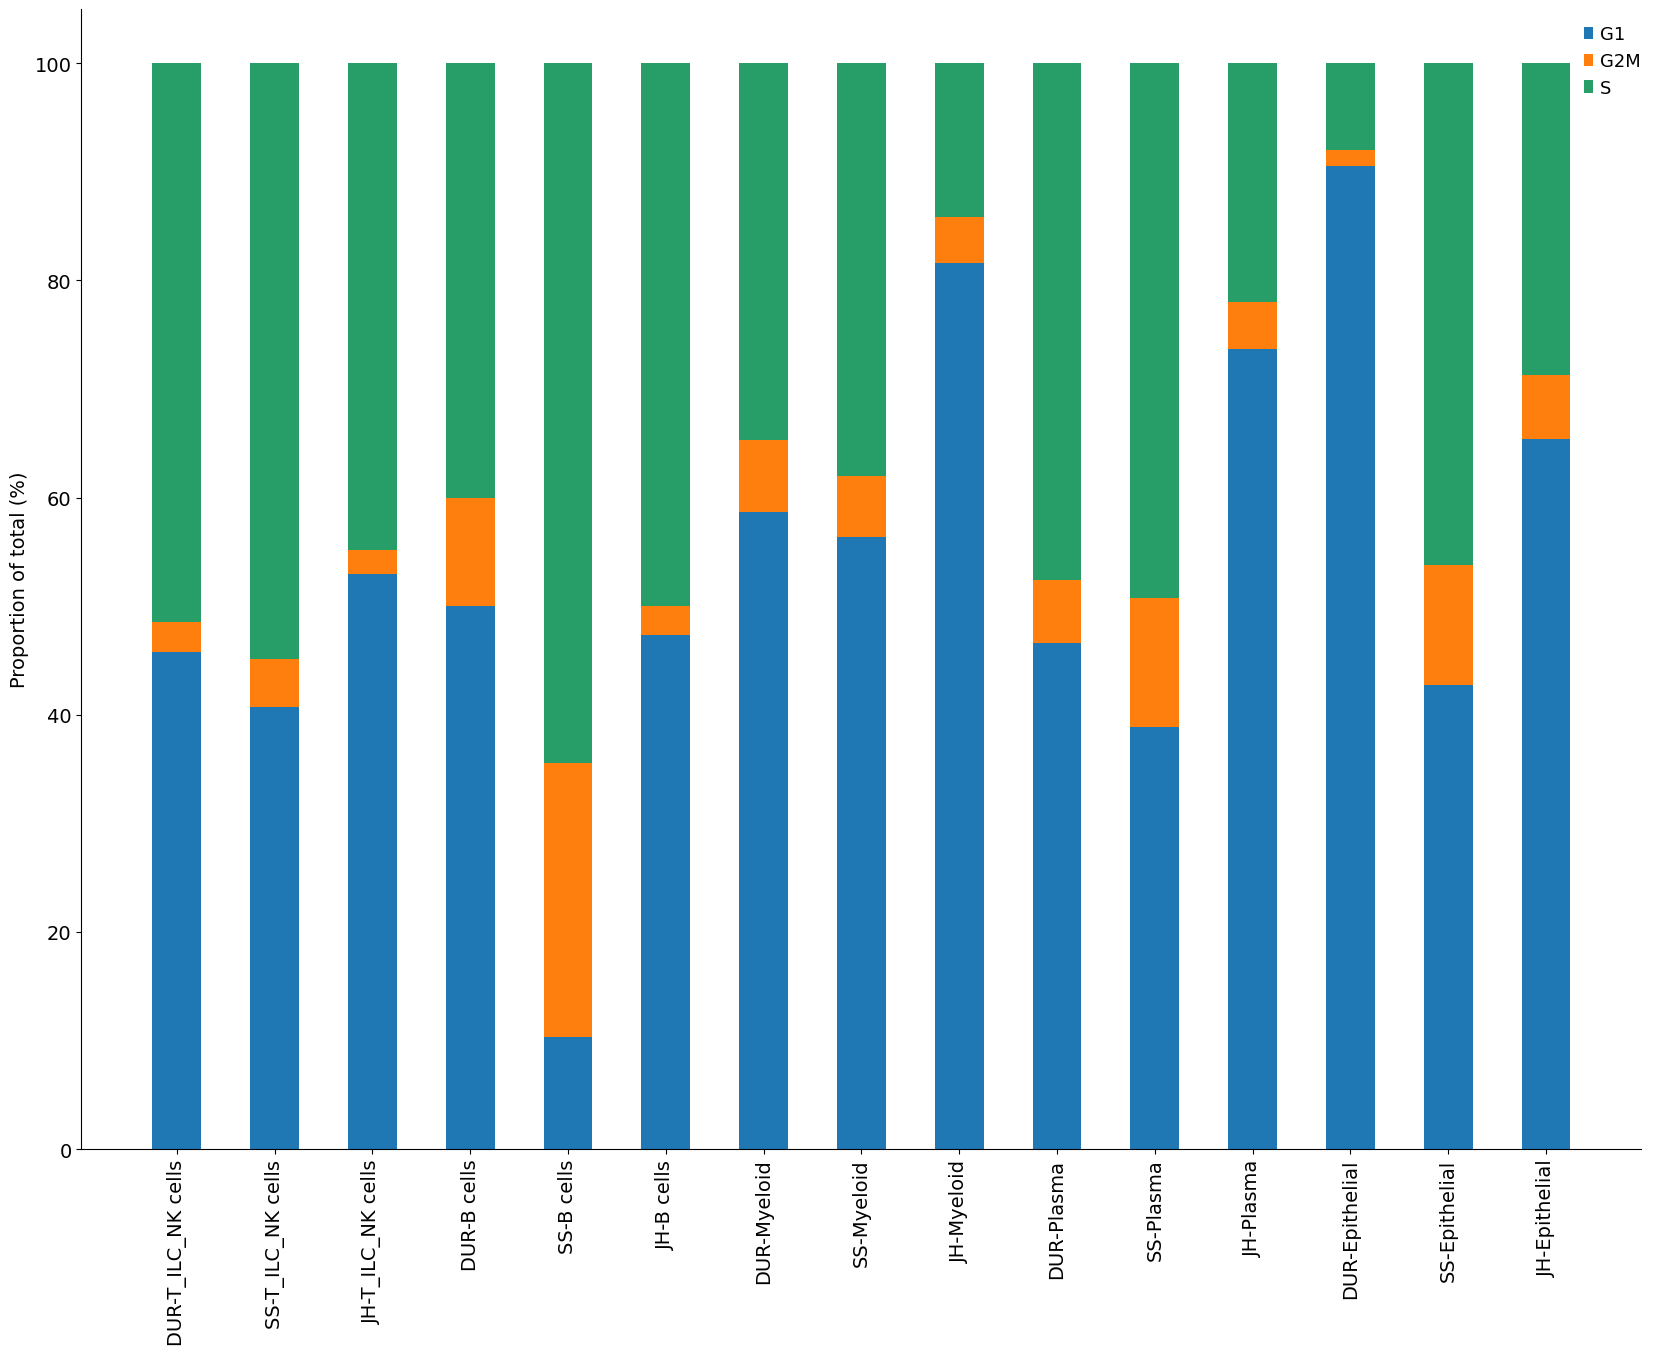

In [69]:
xlabels = times
ylabels = ['0', '20', '40', '60', '80', '100']
time1 = np.array(list1[:, 0])
time2 = np.array(list1[:, 1])
time3 = np.array(list1[:, 2])

data = [time1,time2,time3]
legend = categories

x = range(len(xlabels))
width = 0.5  
bottom_y = np.zeros(len(xlabels))
data = np.array(data)
sums = np.sum(data, axis=0)

numerical_results = [[] for _ in range(len(xlabels))]

plt.figure(figsize=(20, 15))
for i in range(len(data)):
    y = data[i] / sums
    plt.bar(x, y, width, bottom=bottom_y)
    bottom_y = y + bottom_y

    for j, v in enumerate(y):
        numerical_results[j].append(f'{v:.1%} {legend[i]} ({data[i][j]})')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(False)
plt.legend(frameon=False, bbox_to_anchor=(1.01, 1), fancybox=True, ncol=1, labels=legend)
plt.ylabel("Proportion of total (%)")
plt.xticks(x, xlabels, rotation=90)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ylabels)

plt.savefig('_BREED-CellLineage_phase.pdf', format='pdf')
print("数值结果：")
for i, label in enumerate(xlabels):
    print(f"{label}: {', '.join(numerical_results[i])}")